In [12]:
from fastai.vision import *
import torch
torch.cuda.set_device(1)

In [13]:
path = untar_data(URLs.CIFAR)

In [23]:
data = ImageDataBunch.from_folder(path, train = 'train', valid = 'test', bs = 128)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bird,bird,bird,bird,bird
Path: /home/akshay/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bird,bird,bird,bird,bird
Path: /home/akshay/.fastai/data/cifar10;

Test: None

In [24]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


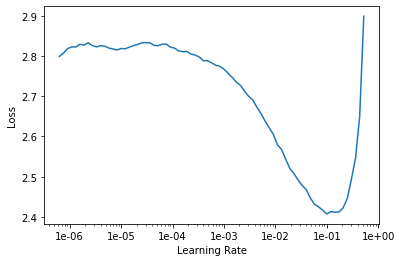

In [25]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit(50)

epoch,train_loss,valid_loss,accuracy,time
0,0.430460,0.708939,0.773800,00:29
1,0.432476,0.707845,0.772000,00:27
2,0.422830,0.703275,0.775600,00:28
3,0.425525,0.714586,0.770900,00:27
4,0.418662,0.706994,0.773400,00:27
5,0.423103,0.700968,0.776000,00:28
6,0.422239,0.717170,0.777600,00:27
7,0.411894,0.711558,0.775500,00:28
8,0.420164,0.708964,0.773800,00:28
9,0.417515,0.707514,0.778300,00:29
